In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp
from sklearn.manifold import TSNE
import datautils

train_data, train_labels, test_data, test_labels = datautils.load_arrowhead_data()

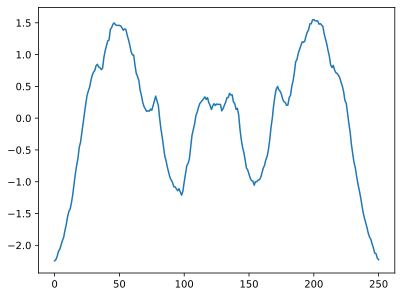

In [12]:
idx = 9
plt.plot(np.arange(len(train_data[idx])), train_data[idx])

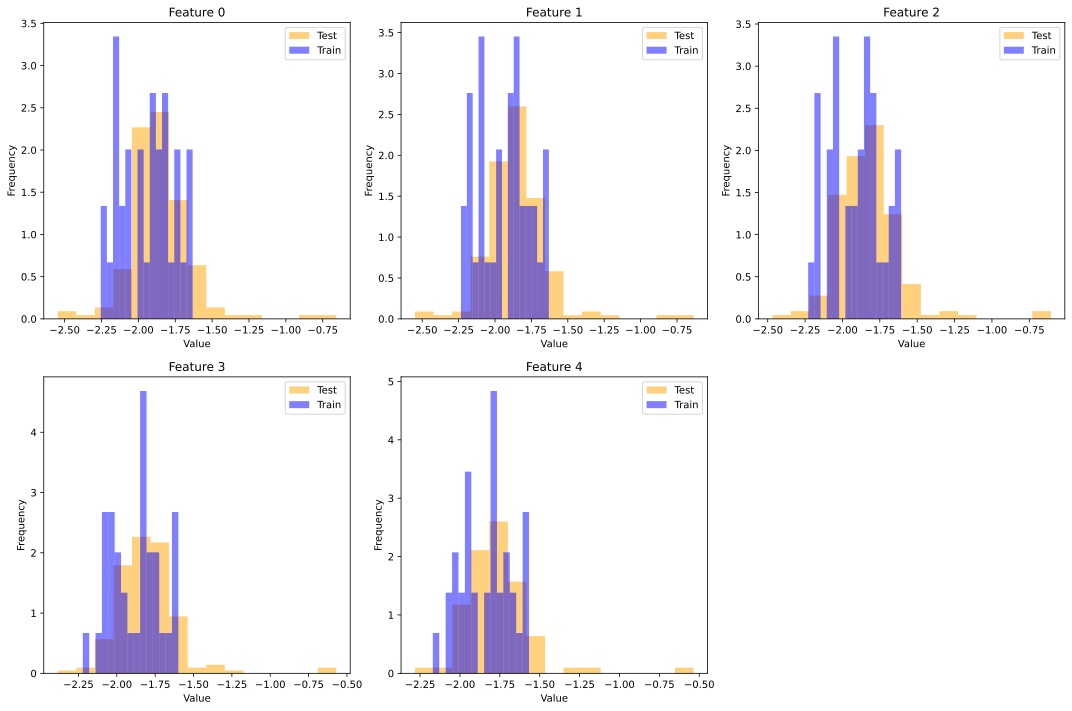

Number of features with significantly different distributions: 9 / 251
Details of features with significant differences (if any):
Feature 0: KS Statistic = 0.2640, p-value = 0.0249
Feature 1: KS Statistic = 0.2590, p-value = 0.0292
Feature 2: KS Statistic = 0.2583, p-value = 0.0300
Feature 3: KS Statistic = 0.2525, p-value = 0.0360
Feature 18: KS Statistic = 0.2430, p-value = 0.0482
Feature 146: KS Statistic = 0.2505, p-value = 0.0382
Feature 222: KS Statistic = 0.2456, p-value = 0.0445
Feature 249: KS Statistic = 0.2525, p-value = 0.0360
Feature 250: KS Statistic = 0.2533, p-value = 0.0351


In [34]:
# Plotting histograms for a few features
num_features_to_plot = min(5, train_data.shape[1])  # adjust number of features to plot if needed
plt.figure(figsize=(15, 10))

for i in range(num_features_to_plot):
    plt.subplot(2, (num_features_to_plot + 1) // 2, i + 1)
    plt.hist(test_data[:, i], bins=15, alpha=0.5, label="Test", color="orange", density=True)
    plt.hist(train_data[:, i], bins=15, alpha=0.5, label="Train", color="blue", density=True)
    plt.title(f"Feature {i}")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.legend()

plt.tight_layout()
plt.show()

# Performing the Kolmogorov-Smirnov test for each feature
ks_results = []
for i in range(train_data.shape[1]):
    stat, p_value = ks_2samp(train_data[:, i], test_data[:, i])
    ks_results.append((i, stat, p_value))

# Checking how many features have p-value less than 0.05 (indicating significant difference)
different_features = [(i, stat, p) for i, stat, p in ks_results if p < 0.05]

print(f"Number of features with significantly different distributions: {len(different_features)} / {train_data.shape[1]}")
print("Details of features with significant differences (if any):")
for i, stat, p in different_features:
    print(f"Feature {i}: KS Statistic = {stat:.4f}, p-value = {p:.4f}")


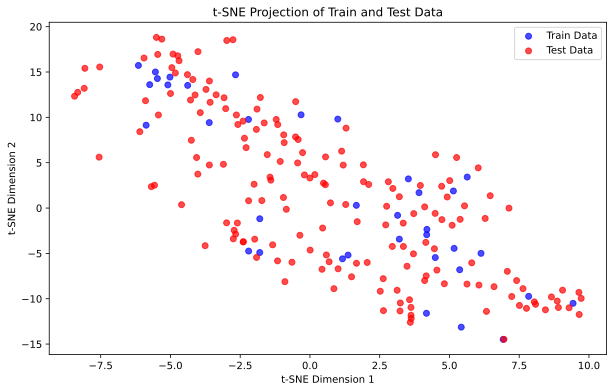

In [46]:
# Generate some random data for this example
# train_data = np.random.rand(36, 151)
# test_data = np.random.rand(175, 151)

# Combine the train and test data for a single t-SNE fit
combined_data = np.vstack((train_data, test_data))

# Apply t-SNE with 2 components for 2D visualization
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(combined_data)

# Separate the results back into train and test components
train_tsne = tsne_results[:len(train_data)]
test_tsne = tsne_results[len(train_data):]

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(train_tsne[:, 0], train_tsne[:, 1], color='blue', label='Train Data', alpha=0.7)
plt.scatter(test_tsne[:, 0], test_tsne[:, 1], color='red', label='Test Data', alpha=0.7)
plt.legend()
plt.title("t-SNE Projection of Train and Test Data")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()
